# Classification using machine learning

#### Concepts covered

* Classification
* Decision trees
* Overfitting
* Train/test split
* Cross-validation
* Hyper-parameter
* Bagging/boosting

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np
plt.style.use('sciml-style')

In [2]:
def visualize_classifier(model, X, y, ax=None, cmap='viridis'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

## Set up the data

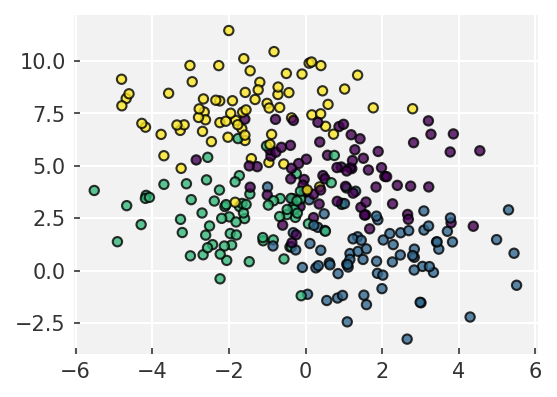

In [3]:
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, alpha=0.8)

## Define a decision tree and fit

We can import a decision tree classifier from `scikit-learn` and use this to try to classify the data into clsuters.

Go to [lecture notes]() to cover the theory of decision trees

In [4]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

/home/mts87985/src/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: The following kwargs were not used by contour: 'clim'


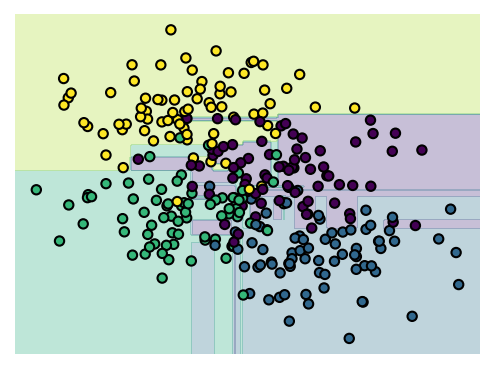

In [5]:
visualize_classifier(DecisionTreeClassifier(), X, y)

Notice that in the middle there seem to be rather arbitrary classification of regions of the data. Try rerunnig the clustering for different random sub-sets of the training data.

/home/mts87985/src/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: The following kwargs were not used by contour: 'clim'
/home/mts87985/src/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: The following kwargs were not used by contour: 'clim'


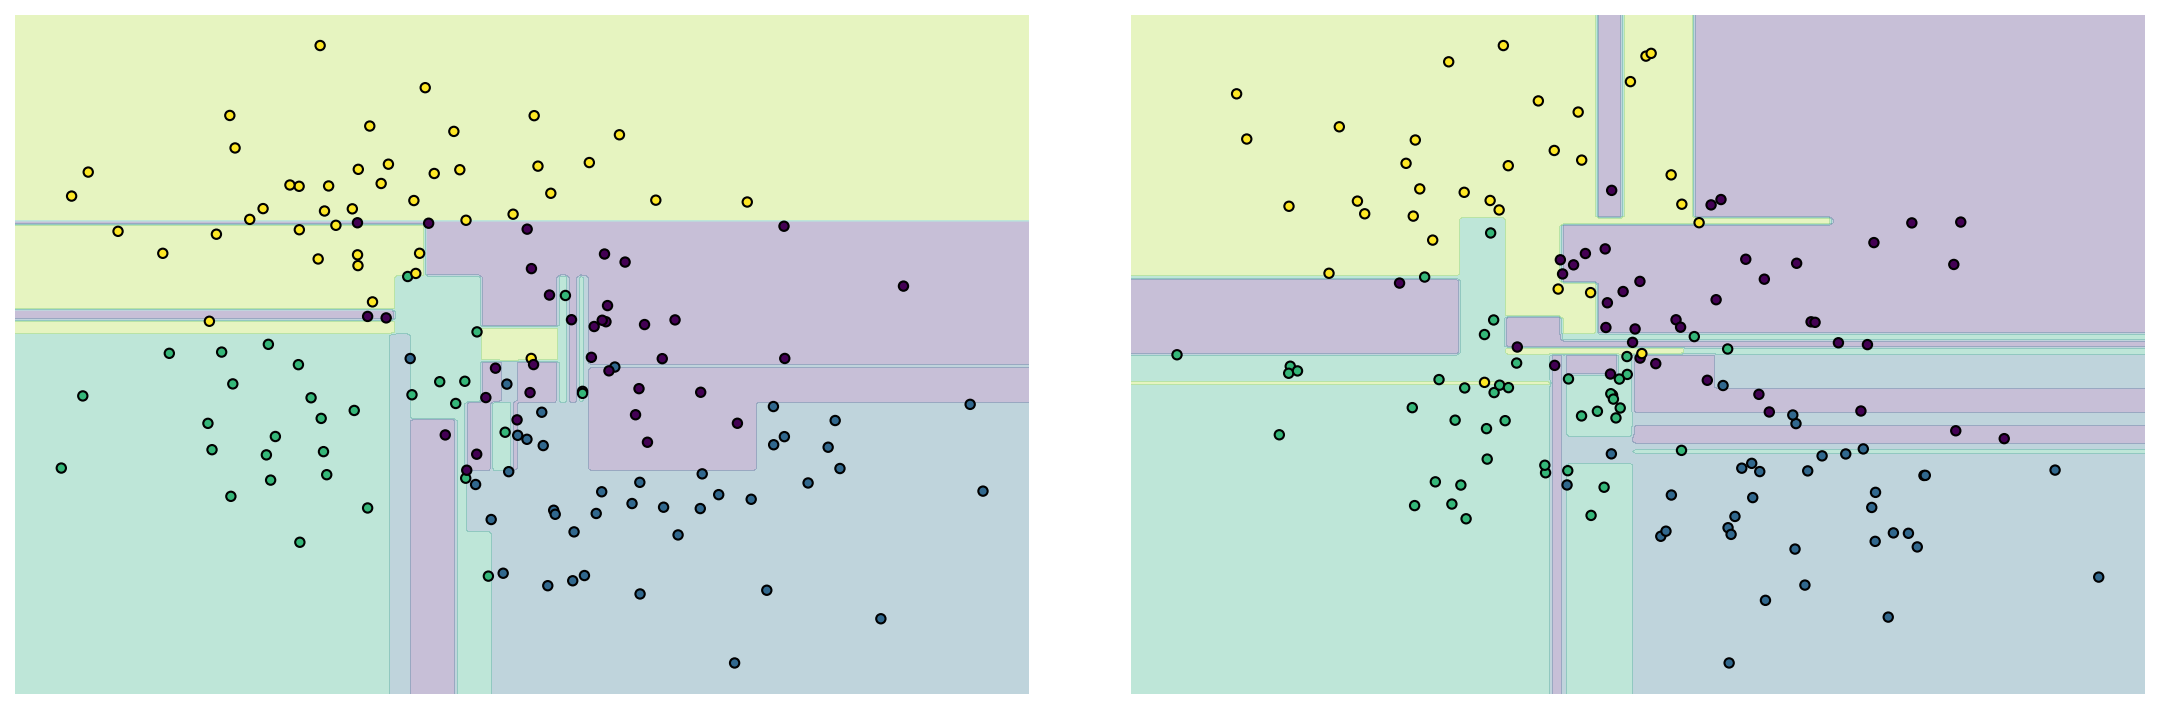

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
visualize_classifier(DecisionTreeClassifier(), X[::2], y[::2], ax=ax[0])
visualize_classifier(DecisionTreeClassifier(), X[1::2], y[1::2], ax=ax[1])

You can see that the classification is consistent in some regions, but quite different in the centre of the plot. It is concerning that the details of the classification in the centre of the plot are depedent on the training data. This is a classic sign that the model is **overfitting**.

Of course, we can see visually that this overfitting is occuring, but is there a more systematic way of detecting overfitting?

To do this we first need to have an objective measure of how well the model is performing. We need a **metric**.

Go to [lecture notes]() to cover metrics for evaluation of models.

### Evaluation

We are now in a position to evaluate how the model is performing. Let's start by once again fitting the model to our dataset `(X, y)`. 

Next we get the predicted values of `y` by using the `predict` method of the new model.

Finally use the `accuracy_score` metric from `scikit-learn` to get the accuracy of the model on this data

In [8]:
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier().fit(X, y)
y_pred = tree.predict(X)
print(accuracy_score(y, y_pred))

1.0


That's pretty accurate!!

But wait up a moment - let's try the model on some new data - generated the same way as before, but which was not used in the training.

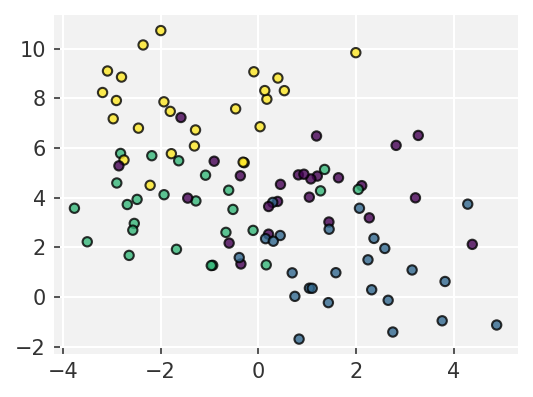

In [9]:
Xnew, ynew = make_blobs(n_samples=100, centers=4,
                  random_state=0, cluster_std=1.5)
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, alpha=0.8)

In [10]:
y_pred = tree.predict(Xnew)
print(accuracy_score(ynew, y_pred))

0.8


That's not quite as good as before!

The model is overfitting - i.e. it is performing well on training data but not generalising beyond the training set. This often results when the model has too many *parameters* and fits too flexibly to the training data. The number of parameters in the model is a *hyper parameter* and must be specified to choose the model. 

We are going to use a training/test split and cross-validation to tune the hyper parameters of the model. Go to the [lecture notes]() for some more in-depth examples.

In [11]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth':range(1, 20, 1)}
tree = DecisionTreeClassifier()
search = GridSearchCV(tree, param_grid, cv=5)

In [12]:
gs = search.fit(X, y)

Text(0, 0.5, 'Val Accuracy')

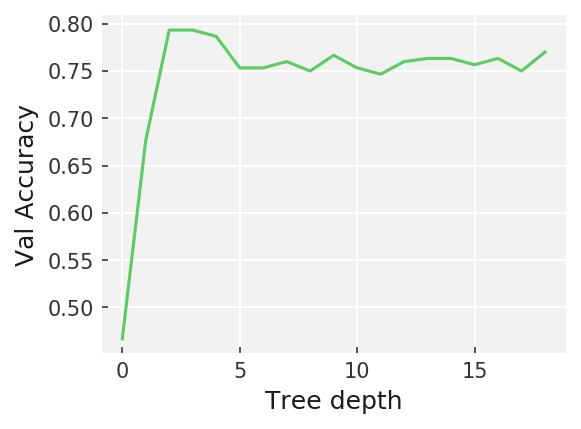

In [14]:
plt.plot(search.cv_results_['mean_test_score'])
plt.xlabel('Tree depth')
plt.ylabel('Val Accuracy')

In [20]:
tree = DecisionTreeClassifier(max_depth=15).fit(X, y)
y_pred = tree.predict(Xnew)
print(accuracy_score(ynew, y_pred))

0.79


## Bagging and boosting

We can improve the performance of decision trees in two simple ways. Bagging and boosting. Bagging involves training an ensemble of trees on subsets of the training set. This way we can take the average result of the ensemble rather than any given individual result.

Boosting involves training a new decision tree based on the errors of the first tree. See the [lecture notes]() for a more in depth discussion of bagging and boosting.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=300, random_state=0)
forest.fit(X, y)
visualize_classifier(model, X, y)

In [ ]:
y_pred = forest.predict(Xnew)
print(accuracy_score(ynew, y_pred))